In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/HrantDavtyan/Data_Scraping/master/Week%202/Datasets/Titanic.csv")

In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
#Task 1- Drop Cabin
#Task 2- Drop Na
#Axis-o-row/1-column

data=data.drop("Cabin",axis=1)
data=data.dropna()
data.head()

ValueError: labels ['Cabin'] not contained in axis

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
data_obj=data.select_dtypes(include=["object"])
data_num=data.select_dtypes(exclude=["object"])

In [25]:
data_num.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
885,886,0,3,39.0,0,5,29.125
886,887,0,2,27.0,0,0,13.000
887,888,1,1,19.0,0,0,30.000
889,890,1,1,26.0,0,0,30.000
890,891,0,3,32.0,0,0,7.750


In [26]:
data_num.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [27]:
len(data_num)


712

In [29]:
data_num.Survived.value_counts()/len(data_num)*100

0    59.550562
1    40.449438
Name: Survived, dtype: float64

In [30]:
data_num.Pclass.value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [31]:
data_num.SibSp.value_counts()

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

In [32]:
data_num.Survived.unique()

array([0, 1], dtype=int64)

In [36]:
data_num.Fare.describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

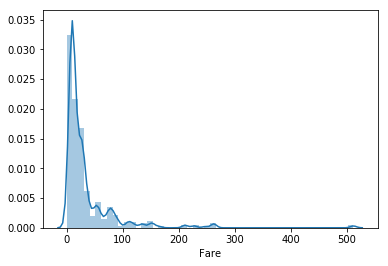

In [40]:
sns.distplot(data_num.Fare)

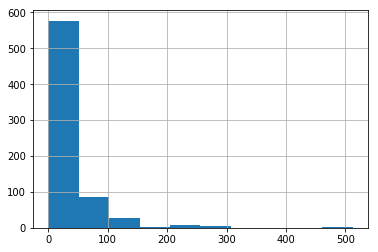

In [45]:
data_num.Fare.hist(bins=10)

In [46]:
data_obj.head(3)

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S


In [47]:
data_obj.Sex.unique()

array(['male', 'female'], dtype=object)

In [49]:
data_obj.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [53]:
data_obj.Sex = np.where(data_obj.Sex=="male",1,0)
data_obj.head(3)
#male-1 female-0

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",1,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,C
2,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,S


In [54]:
data_obj.Sex = data_obj.Sex.astype("category").cat.codes

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [55]:
data_obj.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [60]:
dummies=pd.get_dummies(data_obj.Embarked,prefix="Embarked")
data_obj = data_obj.join(dummies)
data_obj.tail(3)

,Name,Sex,Ticket,Embarked,Embarked_C,Embarked_Q,Embarked_S
887,"Graham, Miss. Margaret Edith",0,112053,S,0,0,1
889,"Behr, Mr. Karl Howell",1,111369,C,1,0,0
890,"Dooley, Mr. Patrick",1,370376,Q,0,1,0


In [61]:
data_full = data_num.join(data_obj)

In [62]:
data_full.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",1,A/5 21171,S,0,0,1
1,2,1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,C,1,0,0
2,3,1,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,S,0,0,1


In [64]:
cond1=data_full.Sex==1
cond2=data_full.Sex==0

data_males = data_full[cond1]
male_survived=data_males.Survived.value_counts()[1]

data_females = data_full[cond2]
female_survived=data_females.Survived.value_counts()[1]

male_survived/female_survived



0.47692307692307695